# Comparison of Individual, Bagging and Boosting Algorithms

In [8]:
# !pip install xgboost

In [40]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [10]:
# import the data
df = sns.load_dataset('diamonds')

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [12]:
df.shape

(53940, 10)

In [13]:
# split the data into X and y
X = df.drop('cut', axis=1)
y = df['cut']

# encode the input variables
le = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# encode the target variable
y = le.fit_transform(y)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree Classification

Accuracy score:  0.7162588060808306
Precision score:  0.7162588060808306
Recall score:  0.7162588060808306
F1 score:  0.7162588060808306
Confusion matrix: 
 [[ 289   31    3    6    6]
 [  31  698   22   28  225]
 [   4   24 3404  318  542]
 [   5   51  329 2025  365]
 [   9  250  469  343 1311]]
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       335
           1       0.66      0.70      0.68      1004
           2       0.81      0.79      0.80      4292
           3       0.74      0.73      0.74      2775
           4       0.54      0.55      0.54      2382

    accuracy                           0.72     10788
   macro avg       0.72      0.73      0.72     10788
weighted avg       0.72      0.72      0.72     10788

CPU times: user 366 ms, sys: 0 ns, total: 366 ms
Wall time: 365 ms


Text(95.72222222222221, 0.5, 'Actual')

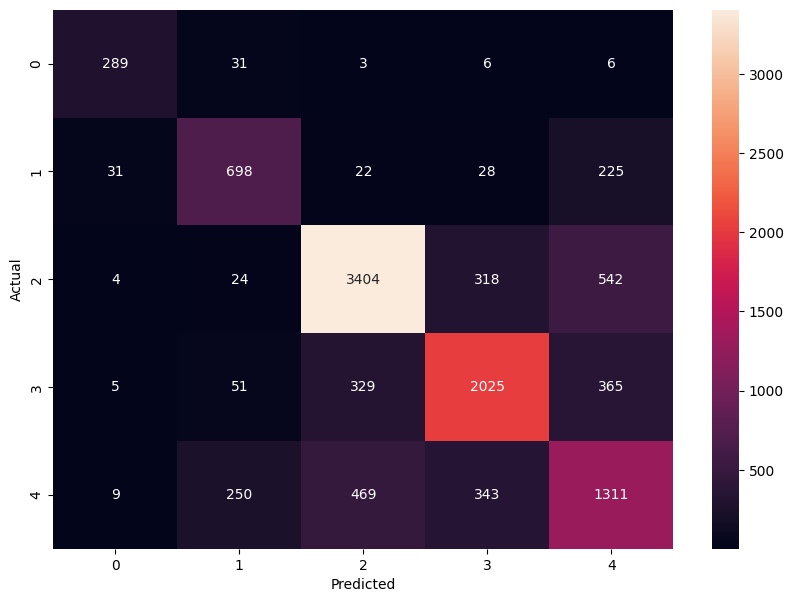

In [14]:
%%time
# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# predict the test data

y_pred = dt.predict(X_test)

as_Dtree = accuracy_score(y_test, y_pred)
ps_Dtree = precision_score(y_test, y_pred, average='micro')
rs_Dtree = recall_score(y_test, y_pred, average='micro')
fs_Dtree = f1_score(y_test, y_pred, average='micro')

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Random Forest Classification

Accuracy score:  0.7865220615498703
Precision score:  0.7865220615498703
Recall score:  0.7865220615498703
F1 score:  0.7865220615498703
Confusion matrix: 
 [[ 302   19    3    7    4]
 [  20  714   21   41  208]
 [   2   14 3938  161  177]
 [   0   13  303 2261  198]
 [   3  152  502  455 1270]]
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       335
           1       0.78      0.71      0.75      1004
           2       0.83      0.92      0.87      4292
           3       0.77      0.81      0.79      2775
           4       0.68      0.53      0.60      2382

    accuracy                           0.79     10788
   macro avg       0.80      0.78      0.78     10788
weighted avg       0.78      0.79      0.78     10788



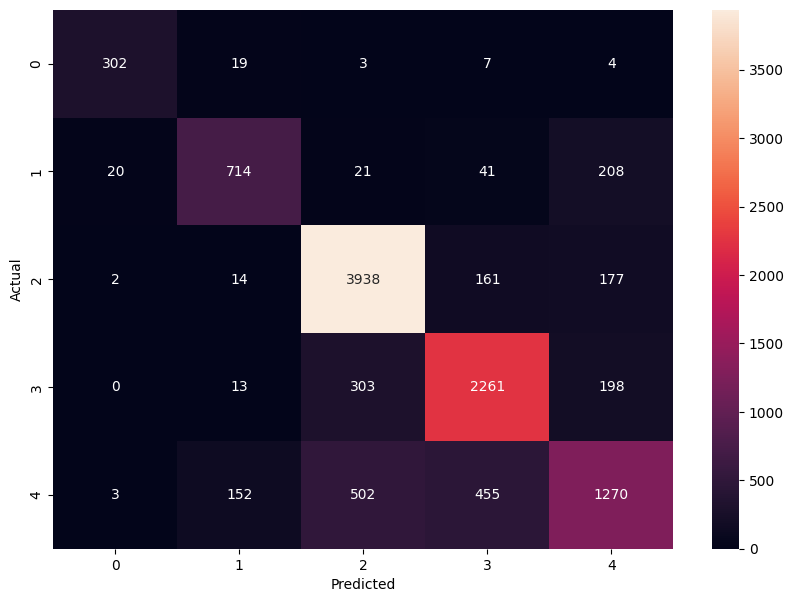

CPU times: user 5.69 s, sys: 45.7 ms, total: 5.73 s
Wall time: 5.73 s


In [15]:
%%time
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict the test data
y_pred = rf.predict(X_test)

as_RF = accuracy_score(y_test, y_pred)
ps_RF = precision_score(y_test, y_pred, average='micro')
rs_RF = recall_score(y_test, y_pred, average='micro')
fs_RF = f1_score(y_test, y_pred, average='micro')

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### XGB / Gradient Boosting Classification

Accuracy score:  0.8056173526140156
Precision score:  0.8056173526140156
Recall score:  0.8056173526140156
F1 score:  0.8056173526140156
Confusion matrix: 
 [[ 303   19    3    6    4]
 [  23  714   14   20  233]
 [   1   11 3948  164  168]
 [   1    7  300 2274  193]
 [   3  137  501  289 1452]]
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       335
           1       0.80      0.71      0.75      1004
           2       0.83      0.92      0.87      4292
           3       0.83      0.82      0.82      2775
           4       0.71      0.61      0.66      2382

    accuracy                           0.81     10788
   macro avg       0.82      0.79      0.80     10788
weighted avg       0.80      0.81      0.80     10788



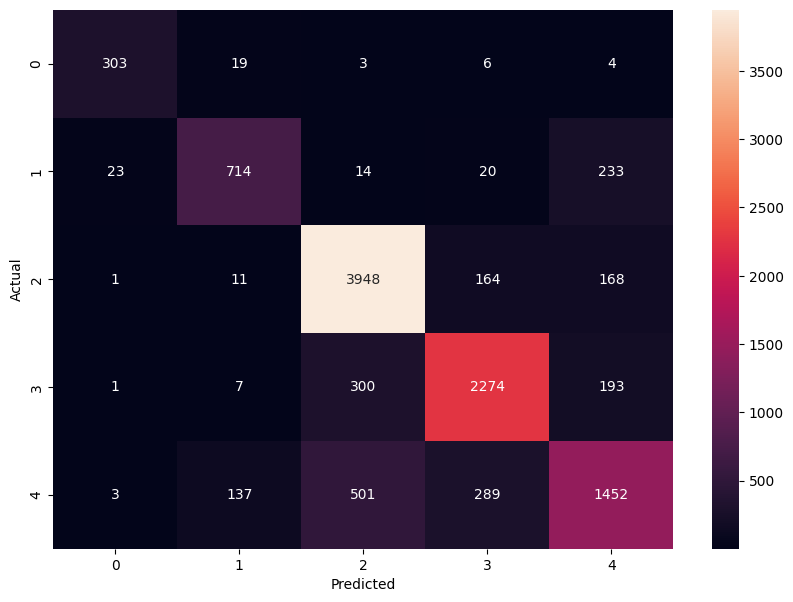

CPU times: user 10.2 s, sys: 33.4 ms, total: 10.2 s
Wall time: 1.1 s


In [ ]:
%%time
# train the xgboost model
xgb = XGBClassifier()
# gbt = GradientBoostingClassifier(n_estimators=100, max_depth=2, random_state=42) # alternative - track record of winning kaggle competitions
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

as_XGB = accuracy_score(y_test, y_pred)
ps_XGB = precision_score(y_test, y_pred, average='micro')
rs_XGB = recall_score(y_test, y_pred, average='micro')
fs_XGB = f1_score(y_test, y_pred, average='micro')

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ADA Boost Classification

Accuracy score:  0.696236559139785
Precision score:  0.696236559139785
Recall score:  0.696236559139785
F1 score:  0.696236559139785
Confusion matrix: 
 [[ 260   34    3   29    9]
 [  26  501   38  215  224]
 [   1   10 4038  219   24]
 [   0   12  344 2115  304]
 [   6  144  723  912  597]]
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.78      0.83       335
           1       0.71      0.50      0.59      1004
           2       0.78      0.94      0.86      4292
           3       0.61      0.76      0.68      2775
           4       0.52      0.25      0.34      2382

    accuracy                           0.70     10788
   macro avg       0.70      0.65      0.66     10788
weighted avg       0.68      0.70      0.67     10788

ROC AUC score:  0.8690651849225175


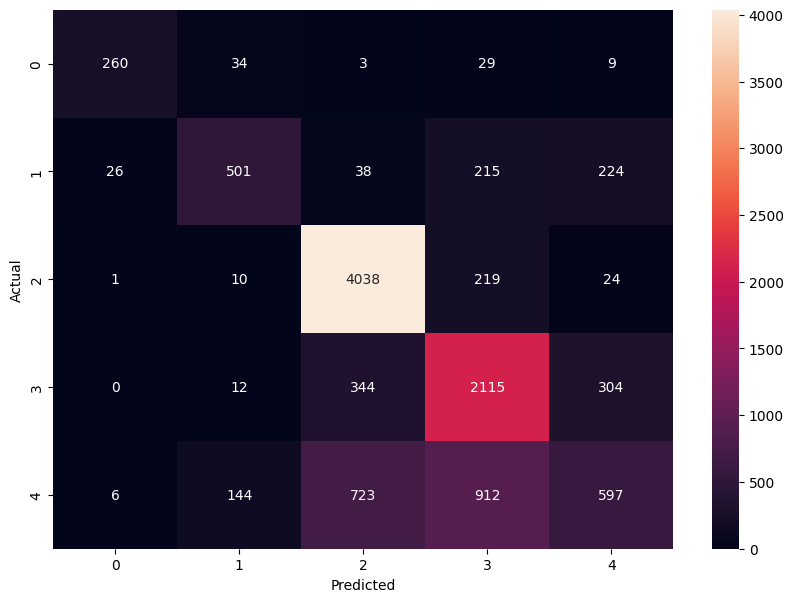

CPU times: user 451 ms, sys: 14 μs, total: 451 ms
Wall time: 451 ms


In [39]:
%%time
# train the ada boost model
# adb = AdaBoostClassifier() # it could also be used without any parameter

dt_classifier = DecisionTreeClassifier(max_depth=2, random_state=1)
adb = AdaBoostClassifier(estimator=dt_classifier,
                         n_estimators=10, # number of weak learners to use
                         random_state=42,
                        #  learning_rate=1.0, # step size at each iteration while moving toward a minimum of a loss function
                         )
adb.fit(X_train, y_train)

# predict the test data
y_pred = adb.predict(X_test)

as_adb = accuracy_score(y_test, y_pred)
ps_adb = precision_score(y_test, y_pred, average='micro')
rs_adb = recall_score(y_test, y_pred, average='micro')
fs_adb = f1_score(y_test, y_pred, average='micro')

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

# predict the test set probabilities of positive class
y_pred_probs = adb.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class= 'ovr') # Evaluate test-set roc_auc_score
print('ROC AUC score: ', roc_auc)

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Plot scores of all models

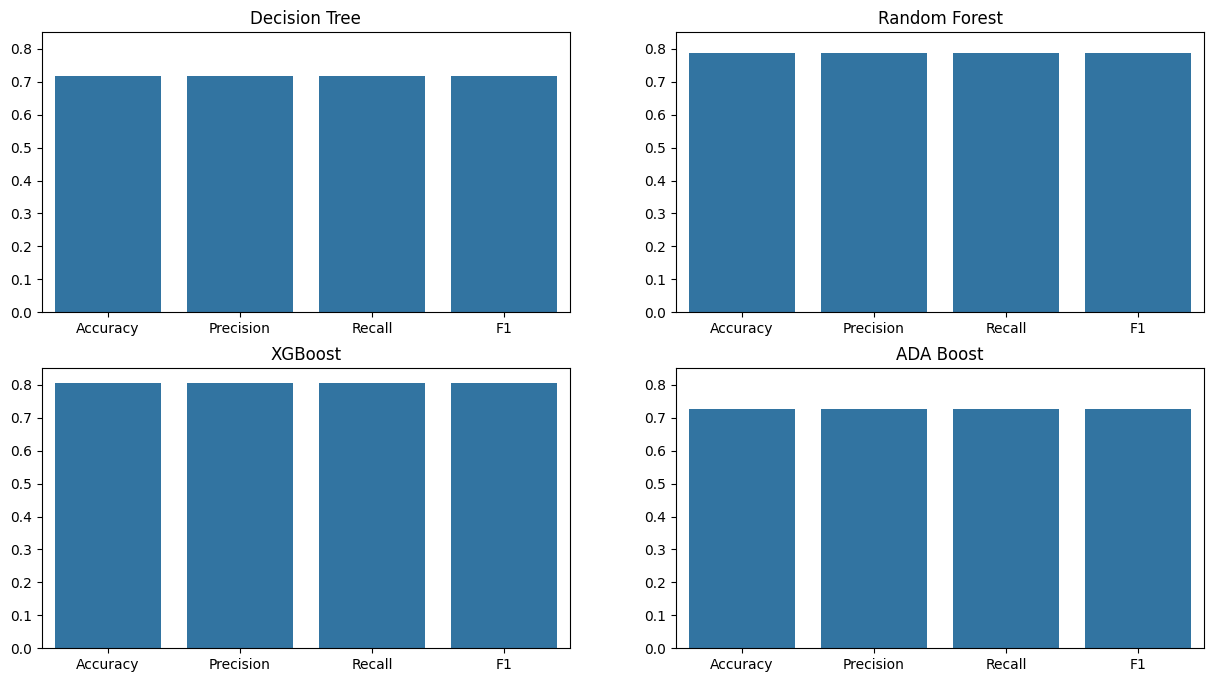

In [24]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[as_Dtree, ps_Dtree, rs_Dtree, fs_Dtree])
plt.title('Decision Tree')
plt.ylim(0, 0.85) # Y axis limit

plt.subplot(2, 2, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[as_RF, ps_RF, rs_RF, fs_RF])
plt.title('Random Forest')
plt.ylim(0, 0.85) # Y axis limit

plt.subplot(2, 2, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[as_XGB, ps_XGB, rs_XGB, fs_XGB])
plt.title('XGBoost')
plt.ylim(0, 0.85) # Y axis limit

plt.subplot(2, 2, 4)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[as_adb, ps_adb, rs_adb, fs_adb])
plt.title('ADA Boost')
plt.ylim(0, 0.85) # Y axis limit

# plt.tight_layout()
plt.show()

## Assignment Alert

### Please compare the mdoels for regression example on your favorite dataset

---